In [123]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
import sklearn
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
import pickle

In [63]:
df = pd.read_csv('Spam_Data.csv')

## 1.Data Cleaning

In [64]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [66]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [67]:
df.sample(5)

,v1,v2
4720,ham,"Yup. Anything lor, if u dun wan it's ok..."
79,ham,Its not the same here. Still looking for a job...
4682,ham,Ok u can take me shopping when u get paid =D
2319,ham,In which place do you want da.
3098,ham,Ok... I din get ur msg...


In [68]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [69]:
df.sample(5)

,target,text
4759,ham,I'm home. Doc gave me pain meds says everythin...
1269,ham,"Tee hee. Off to lecture, cheery bye bye."
355,ham,Thank You for calling.Forgot to say Happy Onam...
4267,ham,Hey so whats the plan this sat?
1843,ham,Super da:)good replacement for murali


In [70]:
encoder = LabelEncoder()

In [71]:
df['target']= encoder.fit_transform(df['target'])

In [72]:
df.sample(5)

,target,text
4569,1,Wanna have a laugh? Try CHIT-CHAT on your mobi...
750,1,"Do you realize that in about 40 years, we'll h..."
4693,0,Pls give her the food preferably pap very slow...
461,0,Great. Never been better. Each day gives even ...
3255,0,Who were those people ? Were you in a tour ? I...


In [73]:
#missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [74]:
#Check Duplicate
df.duplicated().sum()

403

In [75]:
#Remove Duplicate
df = df.drop_duplicates(keep='first')

In [76]:
#check duplicate values
df.duplicated().sum()

0

## 2.EDA

In [77]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

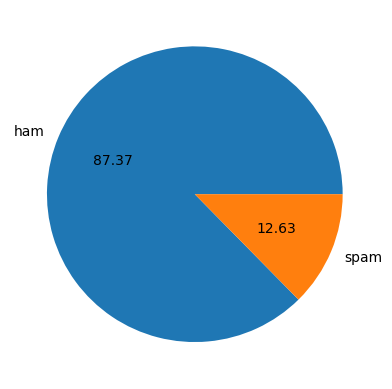

In [78]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [79]:
# !pip install nltk

In [80]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jassi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
df['num_characters'] = df['text'].apply(len)

In [82]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [83]:
df['text'].apply(lambda x: (nltk.word_tokenize(x)))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [84]:
df['num_words'] =df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [85]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [86]:
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [87]:
df['num_sentances'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [88]:
df[['num_characters','num_words','num_sentances']]

,num_characters,num_words,num_sentances
0,111,24,2
1,29,8,2
2,155,37,2
3,49,13,1
4,61,15,1
...,...,...,...
5567,161,35,4
5568,37,9,1
5569,57,15,2
5570,125,27,1


<Axes: xlabel='num_characters', ylabel='Count'>

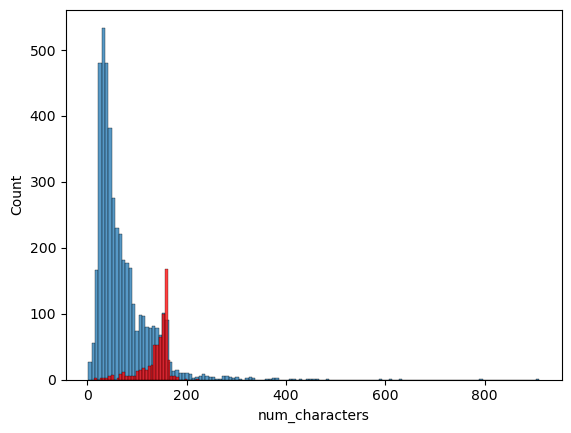

In [89]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

C:\Users\Jassi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


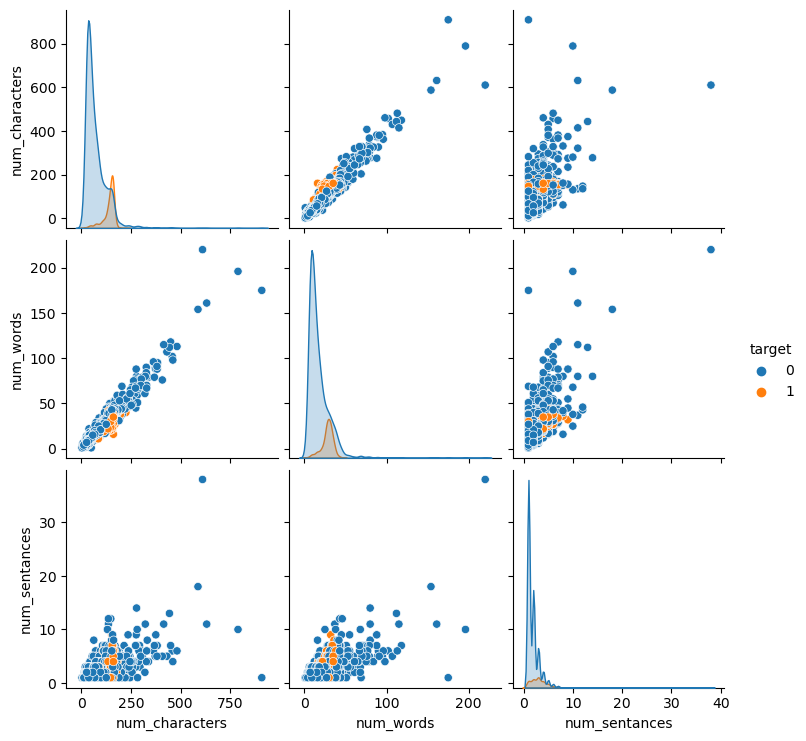

In [90]:
sns.pairplot(df,hue='target')

<Axes: >

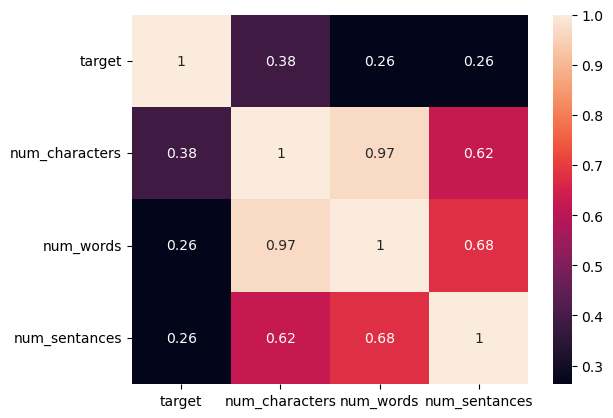

In [91]:
sns.heatmap(df[['target','num_characters','num_words','num_sentances']].corr(),annot=True)

# 3. Data preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Steaming

In [92]:
ps = PorterStemmer()
ps.stem('playing')

'play'

In [93]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [94]:
text = "Hi my name is Jassi, What's your name! I am playing"
transform_text(text)

'hi name jassi name play'

In [95]:
df['transform_text'] = df['text'].apply(transform_text)

In [96]:
df.head()

,target,text,num_characters,num_words,num_sentances,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [97]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [98]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

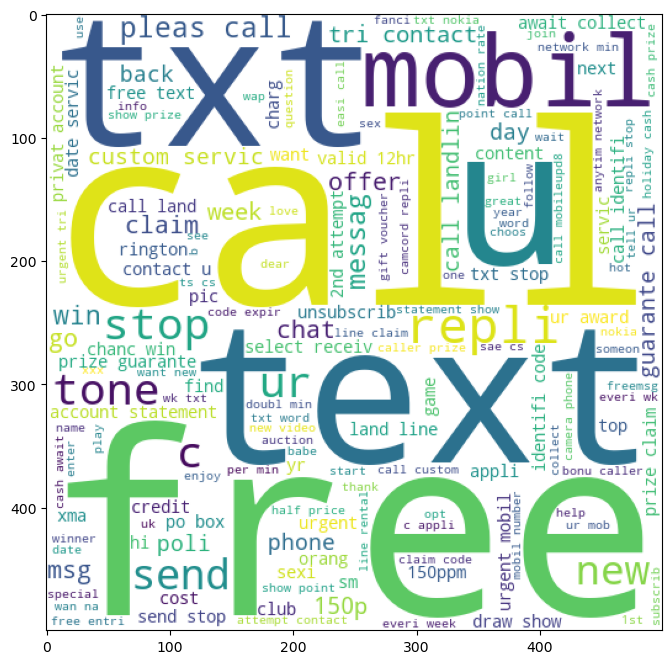

In [99]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [100]:
ham_wc = wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

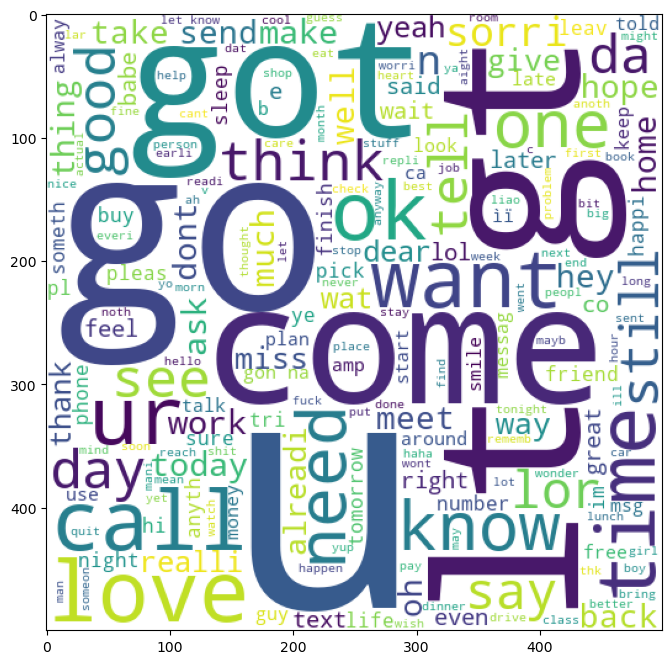

In [101]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [102]:
spam_corpus =[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [103]:
len(spam_corpus)

9939

In [104]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


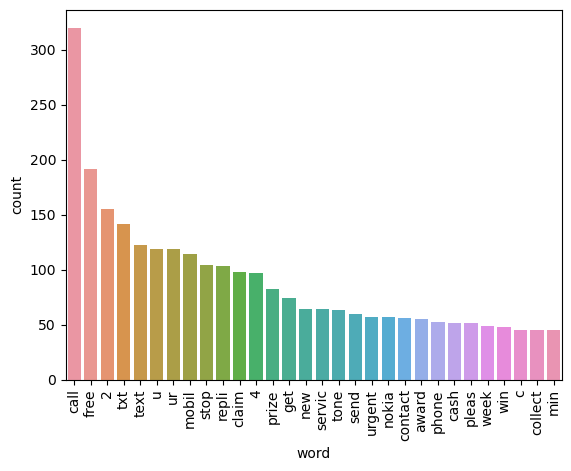

In [105]:
spam_counts = Counter(spam_corpus)
spam_df = pd.DataFrame(spam_counts.most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=spam_df)
plt.xticks(rotation='vertical')
plt.show()

In [106]:
ham_corpus =[]
for msg in df[df['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

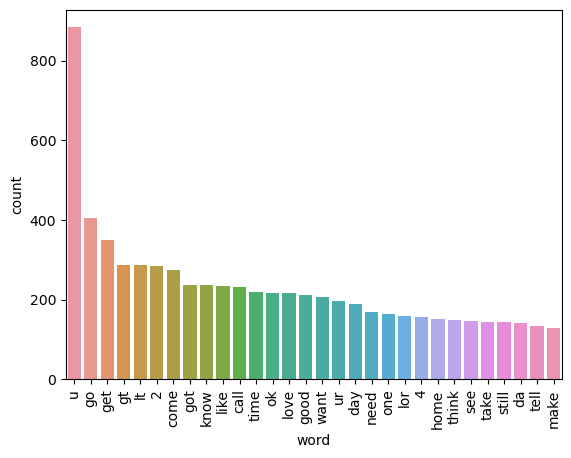

In [107]:
ham_counts = Counter(ham_corpus)
spam_df = pd.DataFrame(ham_counts.most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=spam_df)
plt.xticks(rotation='vertical')
plt.show()

# 3. Model Building

In [108]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [109]:
#X = cv.fit_transform(df['transform_text']).toarray()  #using CountVectorizer
X = tf.fit_transform(df['transform_text']).toarray() # Using TfidVectorizer

In [110]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = scale.fit_transform(X)


In [111]:
y = df['target'].values

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [114]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [115]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [116]:
gnb.fit(X_train,y_train)

GaussianNB()

In [117]:
pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(precision_score(y_test,pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [118]:
mnb.fit(X_train,y_train)
pred2 = mnb.predict(X_test)
print(pred2)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(precision_score(y_test,pred2))

[0 0 0 ... 0 0 0]
0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [119]:
bnb.fit(X_train,y_train)
pred3 = bnb.predict(X_test)
print(pred3)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(precision_score(y_test,pred3))

[0 0 0 ... 0 0 0]
0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


## tfid -> MultinomialNB

In [121]:
pickle.dump(tf,open('vector.pkl','wb'))

In [122]:
pickle.dump(mnb,open('model.pkl','wb'))